In [1]:
import numpy as np

Lets try to fit a difficult function. 

For now I want just to classify the positive and negative regions in the intervals (-10, 10)

$f(x,y)=cos(x+y)+sin(x y)-ℯ^{\frac{x^2}{50}}+1$

In [2]:
def f(x:float, y:float) -> float:
    return np.cos(x+y) + np.sin(x*y) - np.exp((x*x)/50) + 1.5

In [3]:
def binary_f(x:float, y:float) -> float:
    value = f(x, y)
    return np.where(value < 0.0, 0, 1)

In [4]:
x_space = np.linspace(-10, 10, 1000)
y_space = np.linspace(-10, 10, 1000)
pairs = [(x, y) for x, y in zip(x_space, y_space)]

In [5]:
f(x_space, y_space)

array([-5.98733968, -6.18807613, -6.2632709 , -6.1872172 , -5.95829771,
       -5.59891336, -5.15168747, -4.67261232, -4.2222596 , -3.85644464,
       -3.61778269, -3.5294024 , -3.59172235, -3.78271018, -4.06150943,
       -4.37481702, -4.66500021, -4.87870928, -4.97470101, -4.92973822,
       -4.74174225, -4.4297989 , -4.03108693, -3.59524257, -3.17703084,
       -2.82841442, -2.59116895, -2.49108483, -2.53454275, -2.70789341,
       -2.97966538, -3.30522744, -3.63319889, -3.9126772 , -4.10026378,
       -4.16592441, -4.0969065 , -3.89922265, -3.59655456, -3.22678527,
       -2.83668254, -2.47549033, -2.18831121, -2.01016589, -1.96150202,
       -2.04571149, -2.24893562, -2.54213014, -2.88506742, -3.2317112 ,
       -3.53623647, -3.75890519, -3.87104823, -3.85853975, -3.72335872,
       -3.48308587, -3.16844893, -2.8192705 , -2.47936251, -2.19102673,
       -1.98985074, -1.90043274, -1.93353655, -2.08498903, -2.33641123,
       -2.65765025, -3.01057729, -3.35376357, -3.6474547 , -3.85

In [6]:
xs, ys = np.meshgrid(x_space, y_space, sparse=True)
zs = f(xs, ys)

In [7]:
zs

array([[-5.98733968, -6.07164068, -6.13002452, ..., -3.97025475,
        -4.16264253, -4.38269046],
       [-6.13051725, -6.18807613, -6.21448168, ..., -3.86735121,
        -4.02798334, -4.2215191 ],
       [-6.24719194, -6.27277253, -6.2632709 , ..., -3.80070156,
        -3.92564207, -4.08742217],
       ...,
       [-4.08742217, -3.92564207, -3.80070156, ..., -6.2632709 ,
        -6.27277253, -6.24719194],
       [-4.2215191 , -4.02798334, -3.86735121, ..., -6.21448168,
        -6.18807613, -6.13051725],
       [-4.38269046, -4.16264253, -3.97025475, ..., -6.13002452,
        -6.07164068, -5.98733968]], shape=(1000, 1000))

In [8]:
# Import dependencies
# import plotly
# import plotly.graph_objs as go

# # Configure Plotly to be rendered inline in the notebook.
# plotly.offline.init_notebook_mode()

# # Configure the trace.
# trace = go.Scatter3d(
#     x=xs,  # <-- Put your data instead
#     y=ys,  # <-- Put your data instead
#     z=zs,  # <-- Put your data instead
#     mode='markers',
#     marker={
#         'size': 10,
#         'opacity': 0.8,
#     }
# )

# # Configure the layout.
# layout = go.Layout(
#     margin={'l': 0, 'r': 0, 'b': 0, 't': 0}
# )

# data = [trace]

# plot_figure = go.Figure(data=data, layout=layout)

# # Render the plot.
# plotly.offline.iplot(plot_figure)

In [9]:
levels = np.linspace(-9, 3, 9)
levels

array([-9. , -7.5, -6. , -4.5, -3. , -1.5,  0. ,  1.5,  3. ])

In [10]:
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

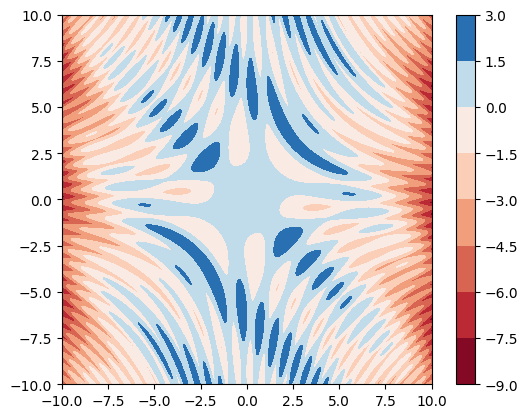

In [11]:
h = plt.contourf(
    x_space, y_space, zs,
    cmap="RdBu", norm=TwoSlopeNorm(0))
plt.axis('scaled')
plt.colorbar()
plt.show()

In [12]:
xs, ys = np.meshgrid(x_space, y_space, sparse=True)
binary_zs = binary_f(xs, ys)

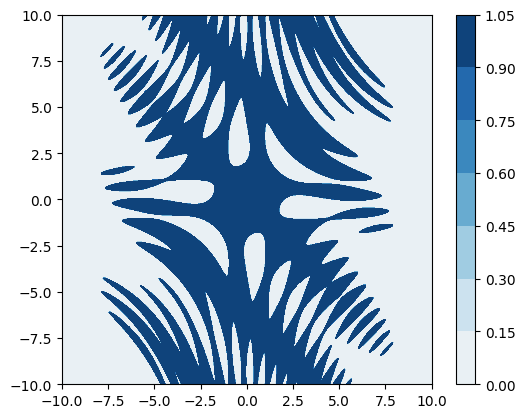

In [13]:
h = plt.contourf(
    x_space, y_space, binary_zs,
    cmap="RdBu", norm=TwoSlopeNorm(0))
plt.axis('scaled')
plt.colorbar()
plt.show()

In [14]:
# x_random = (10 - (-10)) * rng.random_sample((100)) + (-10)
# y_random = (10 - (-10)) * rng.random_sample((100)) + (-10)

In [15]:
rng = np.random.default_rng(12345)
x_random = (10 - (-10)) * rng.random((250,)) + (-10)
y_random = (10 - (-10)) * rng.random((250,)) + (-10)

In [16]:
z_random = binary_f(x_random, y_random)

In [17]:
rng_cv = np.random.default_rng(12)
x_cv = (10 - (-10)) * rng.random((250,)) + (-10)
y_cv = (10 - (-10)) * rng.random((250,)) + (-10)

In [18]:
z_cv = binary_f(x_cv, y_cv)

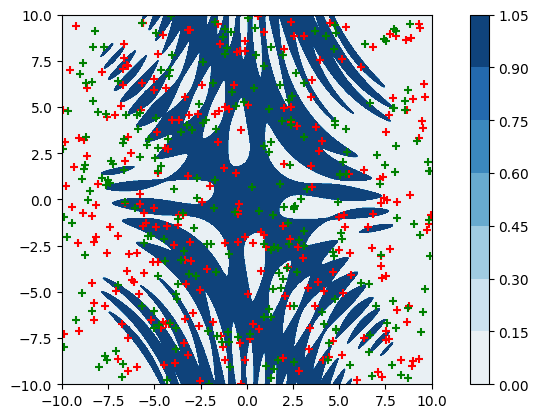

In [32]:
h = plt.contourf(
    x_space, y_space, binary_zs,
    cmap="RdBu", norm=TwoSlopeNorm(0))
plt.colorbar()
s = plt.scatter(
    x_random, y_random, color="r", marker="+"
)

s = plt.scatter(
    x_cv, y_cv, color="g", marker="+"
)
plt.axis('scaled')
plt.show()

/tmp/ipykernel_73361/2940418231.py:18: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


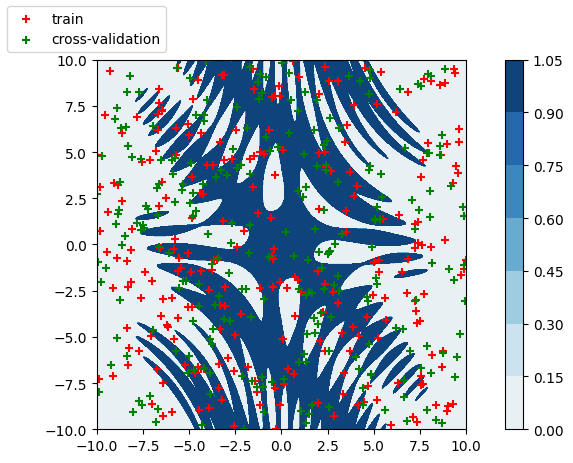

In [31]:
fig, ax = plt.subplots()

h = ax.contourf(
    x_space, y_space, binary_zs,
    cmap="RdBu", norm=TwoSlopeNorm(0))
fig.colorbar(
    h
)
s = ax.scatter(
    x_random, y_random, color="r", marker="+", label="train"
)

s = ax.scatter(
    x_cv, y_cv, color="g", marker="+", label="cross-validation"
)
fig.legend(loc="outside upper left")
ax.axis('scaled')
fig.show()

In [33]:
x_random, y_random, z_random

(array([-5.45327955, -3.66483321,  5.94730915,  3.52509342, -2.17780899,
        -3.34372144,  1.96617507, -6.26531629,  3.45512088,  8.83605731,
        -5.03508571,  8.97762304,  3.34474906, -8.08204129, -1.16320668,
         7.72959839,  3.94907   , -3.47054272,  4.67856327, -5.59730089,
        -8.36810861, -6.80208798, -3.1979963 , -0.69613693, -4.67157943,
         6.31552807, -6.13411221, -7.41061848, -8.16670497,  1.97136027,
         7.09483809,  2.03242483,  8.63976722,  4.49562722,  7.21102635,
         8.58675603,  0.92372018,  8.75345918, -0.1002412 , -4.52453635,
        -0.96442585,  3.30077847, -3.38218139,  8.06908014, -4.85851649,
        -3.20343325, -4.82293203, -2.8910704 , -9.89955333,  2.57209088,
        -4.35234585, -8.63824621,  2.33657955, -6.47347359, -3.91223226,
        -1.18226378, -6.99595318, -5.64142274, -0.51333769, -0.4726229 ,
        -4.89535292, -4.04869464, -4.4186576 , -4.78841575, -0.34476814,
        -5.76041927, -0.08738807, -5.07477348,  6.7

In [34]:
rng = np.random.default_rng(12)
x_random = (10 - (-0)) * rng.random((250,)) + (-0)
y_random = (10 - (-0)) * rng.random((250,)) + (-0)
z_random = binary_f(x_random, y_random)

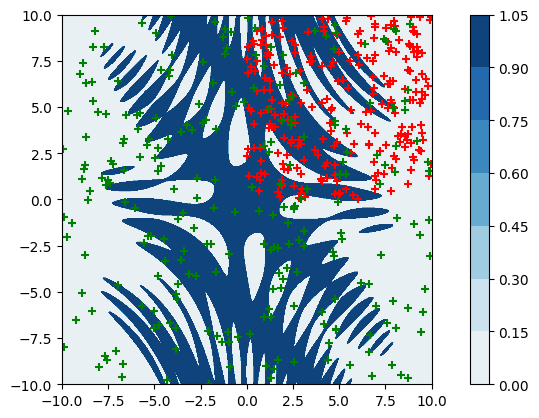

In [35]:
h = plt.contourf(
    x_space, y_space, binary_zs,
    cmap="RdBu", norm=TwoSlopeNorm(0))
plt.colorbar()
s = plt.scatter(
    x_random, y_random, color="r", marker="+"
)

s = plt.scatter(
    x_cv, y_cv, color="g", marker="+"
)
plt.axis('scaled')
plt.show()

In [45]:
rng = np.random.default_rng(45)
x_random = (2) * rng.standard_normal((250,))
y_random = (2) * rng.standard_normal((250,))
z_random = binary_f(x_random, y_random)

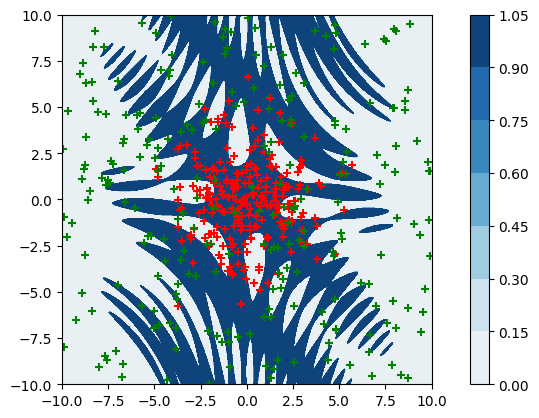

In [46]:
h = plt.contourf(
    x_space, y_space, binary_zs,
    cmap="RdBu", norm=TwoSlopeNorm(0))
plt.colorbar()
s = plt.scatter(
    x_random, y_random, color="r", marker="+"
)

s = plt.scatter(
    x_cv, y_cv, color="g", marker="+"
)
plt.axis('scaled')
plt.show()

In [ ]:
rng = np.random.default_rng(1234598766)
x_random = (2) * rng.standard_normal((250,)) + 3
y_random = (2) * rng.standard_normal((250,)) + 3
z_random = binary_f(x_random, y_random)

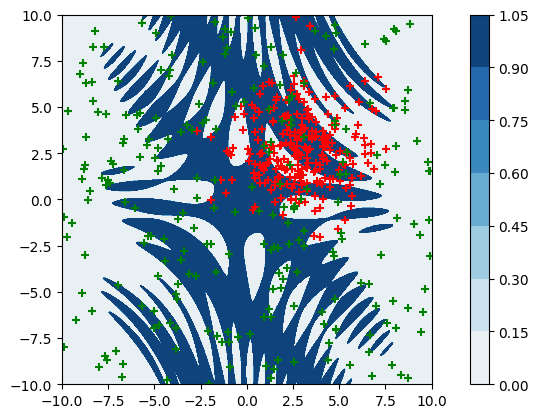

In [50]:
h = plt.contourf(
    x_space, y_space, binary_zs,
    cmap="RdBu", norm=TwoSlopeNorm(0))
plt.colorbar()
s = plt.scatter(
    x_random, y_random, color="r", marker="+"
)

s = plt.scatter(
    x_cv, y_cv, color="g", marker="+"
)
plt.axis('scaled')
plt.show()

In [59]:
rng = np.random.default_rng(1234598766)
x_random = rng.multivariate_normal((3, 3), ((3, 0), (0, 3)), (100, ))
y_random = rng.multivariate_normal((3, 3), ((3, 0), (0, 3)), (100, ))
z_random = binary_f(x_random, y_random)

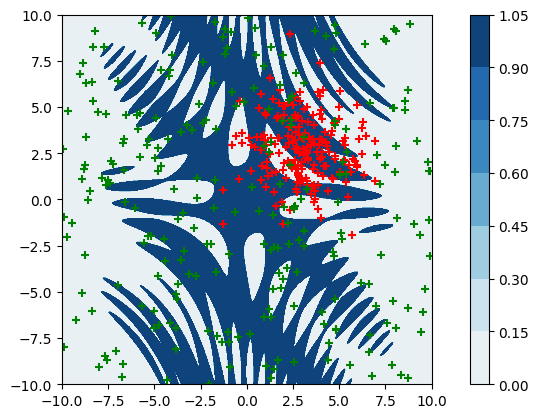

In [60]:
h = plt.contourf(
    x_space, y_space, binary_zs,
    cmap="RdBu", norm=TwoSlopeNorm(0))
plt.colorbar()
s = plt.scatter(
    x_random, y_random, color="r", marker="+"
)

s = plt.scatter(
    x_cv, y_cv, color="g", marker="+"
)
plt.axis('scaled')
plt.show()